In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Introduction** ## 

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a linear regression model from scratch, which tries predict if a patient has this disease or not. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing

## **Data Description** ##


   - age - age in years
   - sex - (1 = male; 0 = female)
   - cp - chest pain type
   - trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   - chol - serum cholestoral in mg/dl
   - fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   - restecg - resting electrocardiographic results
   - thalach - maximum heart rate achieved
   - exang - exercise induced angina (1 = yes; 0 = no)
   - oldpeak - ST depression induced by exercise relative to rest
   - slope - the slope of the peak exercise ST segment
   - ca - number of major vessels (0-3) colored by flourosopy
   - thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
   -  target - have disease or not (1=yes, 0=no)


In [ ]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## **Data preprocessing** ##

 - convert the string value such as ChestPain, Thal, and AHD to numeric format
 - Eliminate rows with missing data 

In [ ]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [ ]:
df['Thal'].unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [ ]:
df = df.dropna()

In [ ]:
df["ChestPainx"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thalx"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})

In [ ]:

df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPainx,Thalx
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,1,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,2,2
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,2,3
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,3,2
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,4,2


In [ ]:
X = df.drop(columns=["Unnamed: 0", "ChestPain", "Thal","AHD"])

X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPainx,Thalx
0,63,1,145,233,1,2,150,0,2.3,3,0.0,1,1
1,67,1,160,286,0,2,108,1,1.5,2,3.0,2,2
2,67,1,120,229,0,2,129,1,2.6,2,2.0,2,3
3,37,1,130,250,0,0,187,0,3.5,3,0.0,3,2
4,41,0,130,204,0,2,172,0,1.4,1,0.0,4,2


In [ ]:
Y = np.array(df["AHD"])


In [ ]:
print(Y)

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1]



## **split data into train and testing set with the help of scikit learn library** ##


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train.head(2))                                              # Standardizing Data 
print(X_train.head(2))

(198, 13)
(99, 13)
(198,)
(99,)
     Age  Sex  RestBP  Chol  Fbs  ...  Oldpeak  Slope   Ca  ChestPainx  Thalx
140   59    1     140   221    0  ...      0.0      1  0.0           4      2
301   57    0     130   236    0  ...      0.0      2  1.0           4      2

[2 rows x 13 columns]
     Age  Sex  RestBP  Chol  Fbs  ...  Oldpeak  Slope   Ca  ChestPainx  Thalx
140   59    1     140   221    0  ...      0.0      1  0.0           4      2
301   57    0     130   236    0  ...      0.0      2  1.0           4      2

[2 rows x 13 columns]


In [ ]:
print(Y_train)

[0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 1 1 1 1 1 1]


## **Data Normalization** ##

- scaling to a range

  converting  feature values from their natural range (for example, 100 to 900) into a standard range—usually 0 and 1 (or sometimes -1 to +1). Use the following simple formula to scale to a range:
  


In [ ]:
X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

## **introduction to multiple linear regression** ##

---



---



Multiple Linear Regression is a type of Linear Regression when the input has multiple features(variables).

Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;

Y = β0​x0​+β1​x1​+β1​x2​+…+βn​xn​

xi​ the ith feature in input variable. By introducing x0​=1, we can rewrite this equation.

Y = β0​+β1​x1​+β1​x2​+…+βn​xn​



In [ ]:
def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred


## **MSE Cost Function** ##

The cost function J for a particular choice of parameters θ is the mean squared error (MSE):

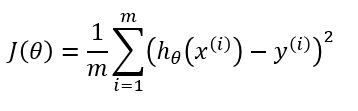

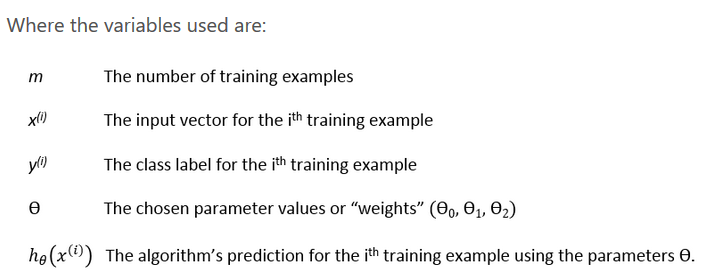

The MSE measures the average amount that the model’s predictions vary from the correct values, so you can think of it as a measure of the model’s performance on the training set. The cost is higher when the model is performing poorly on the training set. The objective of the learning algorithm, then, is to find the parameters θ which give the minimum possible cost J



In [ ]:
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))



##**Gradient Descent - Multiple Variables Example** ##

The MSE cost function includes multiple variables, so let’s look at one more simple minimization example before going back to the cost function.

Let’s take the function:
J(θ)=θ1^2+θ2^2

When there are multiple variables in the minimization objective, gradient descent defines a separate update rule for each variable. The update rule for θ1
uses the partial derivative of J with respect to θ1. A partial derivative just means that we hold all of the other variables constant–to take the partial derivative with respect to θ1, we just treat θ2 as a constant.

 The update rules are in the table below, as well as the math for calculating the partial derivatives. Make sure you work through those; I wrote out the derivation to make it easy to follow.

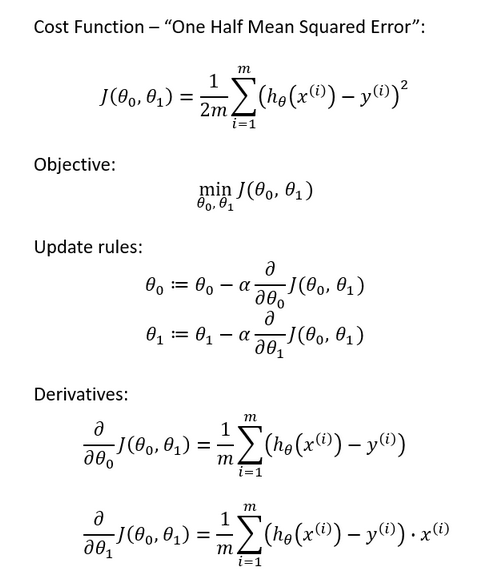


## Learing Rate ## 
Pick a value for the learning rate α. The learning rate determines how big the step would be on each iteration.

   - If α is very small, it would take long time to converge and become computationally expensive.
   - If α is large, it may fail to converge and overshoot the minimum.

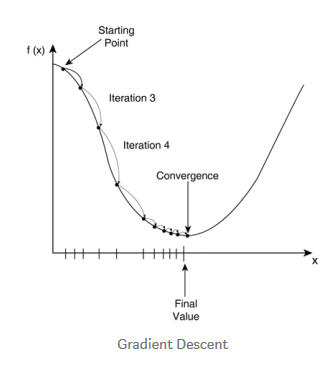

we are changing the values of βj​ in a direction in which it reduces our cost function. And Gradient gives the direction in which we want to move. Finally we will reach the minima of our cost function.

From the above graph, Our aim is to iterate from starting point and working with iterations in such a way that we finally land up on the minimum point of graph.This is achieved by tuning our model with learning rate and number of iterations.


In [ ]:

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])

    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    print(new_x_train)
    # add the new coloum as bias to training sample
    new_x_train[:,0:no_of_columns] = x_train
    print(new_x_train)
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    print(w)

    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05                                # Learning rate Decay 
    return w


In [ ]:
def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

In [ ]:
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized,Y_train,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[ 0.54994496  0.67348342  0.51615413 ...  1.65000671 -0.56015742
   1.        ]
 [ 0.32749531 -1.47731847 -0.08114872 ...  1.65000671 -0.56015742
   1.        ]
 [-0.00617916  0.67348342  0.51615413 ... -0.61875252 -0.56015742
   1.        ]
 ...
 [ 1.2172939   0.67348342  0.2175027  ... -0.61875252  1.14616827
   1.        ]
 [-0.33985363  0.67348342  0.51615413 ... -0.61875252  1.14616827
   1.        ]
 [ 0.88361943 -1.47731847  1.11345697 ... -0.61875252 -0.56015742
   1.        ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
mean square error:  0.5681818181818182 after 0 th iteration
mean square error:  0.12017506120611351 after 1 th iteration
mean square error:  0.02999945856203016 after 2 th iteration
mean square error:  0.0017304035394187208 after 3 th iteration
mean square error:  0.0009291434851528164 after 4 th iteration


0.001218502888511276

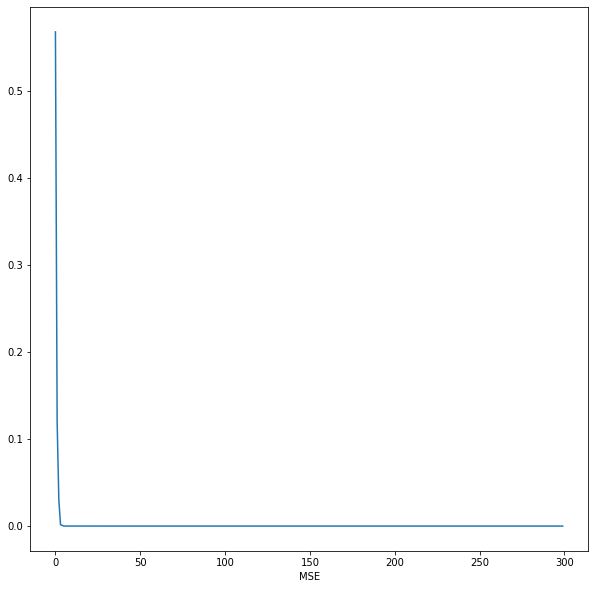

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.plot(range(0,300 ), MSE_points)
plt.xlabel('MSE')
plt.show()
# sns.lineplot(MSE_points)

In [ ]:
pred_df = pd.DataFrame(
    {
        'Actual Value' : Y_test, 
     'Predicted Values' : Y_pred,
    }
)
pred_df.head(20)

,Actual Value,Predicted Values
0,1,0.508814
1,1,1.227339
2,0,0.296826
3,1,1.105668
4,1,0.437948
5,0,0.930793
6,0,0.223461
7,0,0.238489
8,1,0.735502
9,0,0.876715
